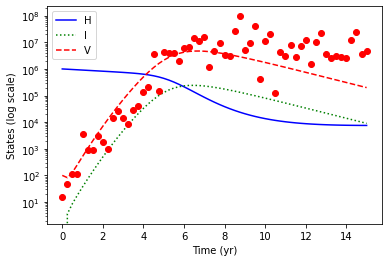

In [2]:
# From: http://apmonitor.com/do/index.php/Main/ModelInitialization

from gekko import GEKKO
import numpy as np

# Manually enter guesses for parameters
lkr = [3,np.log10(0.1),np.log10(2e-7),\
       np.log10(0.5),np.log10(5),np.log10(100)]

# Model
m = GEKKO()

# Time
m.time = np.linspace(0,15,61)
# Parameters to estimate
lg10_kr = [m.FV(value=lkr[i]) for i in range(6)]
# Variables
kr = [m.Var() for i in range(6)]
H = m.Var(value=1e6)
I = m.Var(value=0)
V = m.Var(value=1e2)
# Variable to match with data
LV = m.CV(value=2)
# Equations
m.Equations([10**lg10_kr[i]==kr[i] for i in range(6)])
m.Equations([H.dt() == kr[0] - kr[1]*H - kr[2]*H*V,
             I.dt() == kr[2]*H*V - kr[3]*I,
             V.dt() == -kr[2]*H*V - kr[4]*V + kr[5]*I,
             LV == m.log10(V)])

# option #1 for initialization
#m.options.IMODE = 7 # sequential simulation

# option #2 for initialization
m.options.IMODE = 4 #simultaneous simulation
m.options.COLDSTART = 2

m.options.SOLVER = 1
m.options.MAX_ITER = 1000

m.solve(disp=False)

# patient virus count data
data = np.array([[0,1.20E+00],[0.25,1.67E+00],[0.5,2.06E+00],\
                [0.75,2.05E+00],[1,3.57E+00],[1.25,2.96E+00],\
                [1.5,2.95E+00],[1.75,3.48E+00],[2,3.27E+00], \
                [2.25,2.98E+00],[2.5,4.17E+00],[2.75,4.41E+00],\
                [3,4.16E+00],[3.25,3.94E+00],[3.5,4.44E+00],\
                [3.75,4.60E+00],[4,5.15E+00],[4.25,5.34E+00],\
                [4.5,6.56E+00],[4.75,5.16E+00],[5,6.63E+00],\
                [5.25,6.60E+00],[5.5,6.59E+00],[5.75,6.28E+00],\
                [6,6.79E+00],[6.25,6.81E+00],[6.5,7.16E+00],\
                [6.75,7.06E+00],[7,7.19E+00],[7.25,6.07E+00],\
                [7.5,6.67E+00],[7.75,6.97E+00],[8,6.51E+00],\
                [8.25,6.48E+00],[8.5,7.44E+00],[8.75,7.98E+00],\
                [9,6.71E+00],[9.25,6.98E+00],[9.5,7.60E+00],\
                [9.75,5.62E+00],[10,7.04E+00],[10.25,7.31E+00],\
                [10.5,5.08E+00],[10.75,6.62E+00],[11,6.48E+00],\
                [11.25,6.91E+00],[11.5,6.44E+00],[11.75,6.85E+00],\
                [12,7.09E+00],[12.25,6.20E+00],[12.5,7.02E+00],\
                [12.75,7.34E+00],[13,6.57E+00],[13.25,6.42E+00],\
                [13.5,6.50E+00],[13.75,6.46E+00],[14,6.42E+00],\
                [14.25,7.09E+00],[14.5,7.37E+00],[14.75,6.56E+00],\
                [15,6.69E+00]])

# Convert log-scaled data for plotting
log_v = data[:,1] # 2nd column of data
v = np.power(10,log_v)

# Plot results
import matplotlib.pyplot as plt
plt.figure(1)
plt.semilogy(m.time,H,'b-')
plt.semilogy(m.time,I,'g:')
plt.semilogy(m.time,V,'r--')
plt.semilogy(data[:,][:,0],v,'ro')
plt.xlabel('Time (yr)')
plt.ylabel('States (log scale)')
plt.legend(['H','I','V'])
plt.show()